<a href="https://colab.research.google.com/github/SoungbinC/CMPE_255/blob/Assignment6/plant_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data_path="/content/drive/MyDrive/plant-pathology-2020-fgvc7/"

train = pd.read_csv(data_path+"train.csv")
test = pd.read_csv(data_path+"test.csv")
submission = pd.read_csv(data_path+"sample_submission.csv")

In [4]:
train.head()

image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0

In [5]:
test.head()

image_id
0   Test_0
1   Test_1
2   Test_2
3   Test_3
4   Test_4

In [6]:
submission.head()


image_id  healthy  multiple_diseases  rust  scab
0   Test_0     0.25               0.25  0.25  0.25
1   Test_1     0.25               0.25  0.25  0.25
2   Test_2     0.25               0.25  0.25  0.25
3   Test_3     0.25               0.25  0.25  0.25
4   Test_4     0.25               0.25  0.25  0.25

#Exploratory Data Analysis

In [7]:
healthy = train.loc[train['healthy']==1]
multiple_diseases = train.loc[train['multiple_diseases']==1]
rust = train.loc[train['rust']==1]
scab = train.loc[train['scab']==1]

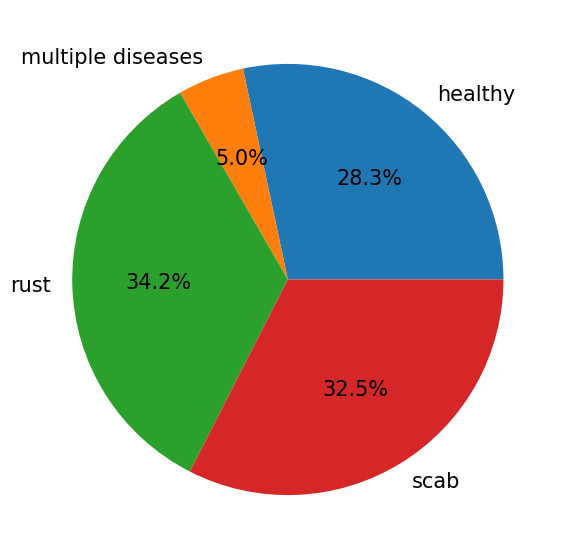

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15)
plt.figure(figsize=(7, 7))

label = ['healthy', 'multiple diseases', 'rust', 'scab']
plt.pie([len(healthy), len(multiple_diseases), len(rust), len(scab)],
        labels=label,
        autopct='%.1f%%');

In [9]:
import matplotlib.gridspec as gridspec
import cv2

def show_image(img_ids, rows=2, cols=3):
    assert len(img_ids) <= rows*cols

    plt.figure(figsize=(15, 8))
    grid = gridspec.GridSpec(rows, cols)


    for idx, img_id in enumerate(img_ids):
        img_path = f'{data_path}/images/{img_id}.jpg'
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax = plt.subplot(grid[idx])
        ax.imshow(image)

In [10]:
num_of_imgs = 6
last_healthy_img_ids = healthy['image_id'][-num_of_imgs:]
last_multiple_diseases_img_ids = multiple_diseases['image_id'][-num_of_imgs:]
last_rust_img_ids = rust['image_id'][-num_of_imgs:]
last_scab_img_ids = scab['image_id'][-num_of_imgs:]

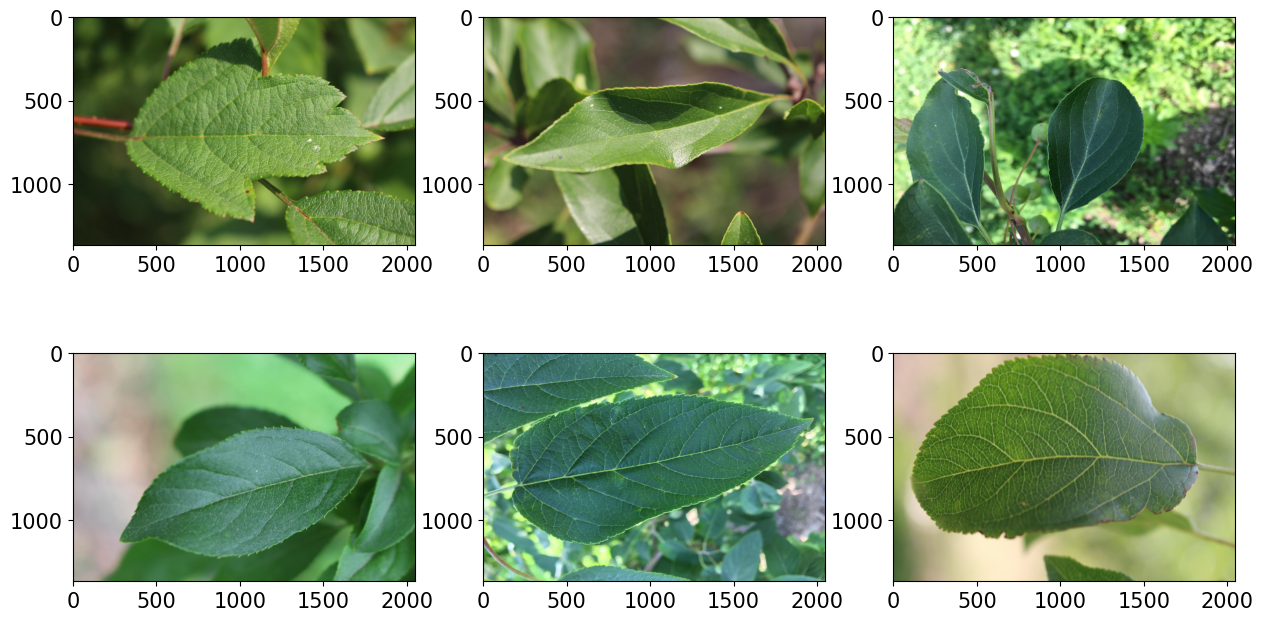

In [11]:
show_image(last_healthy_img_ids)

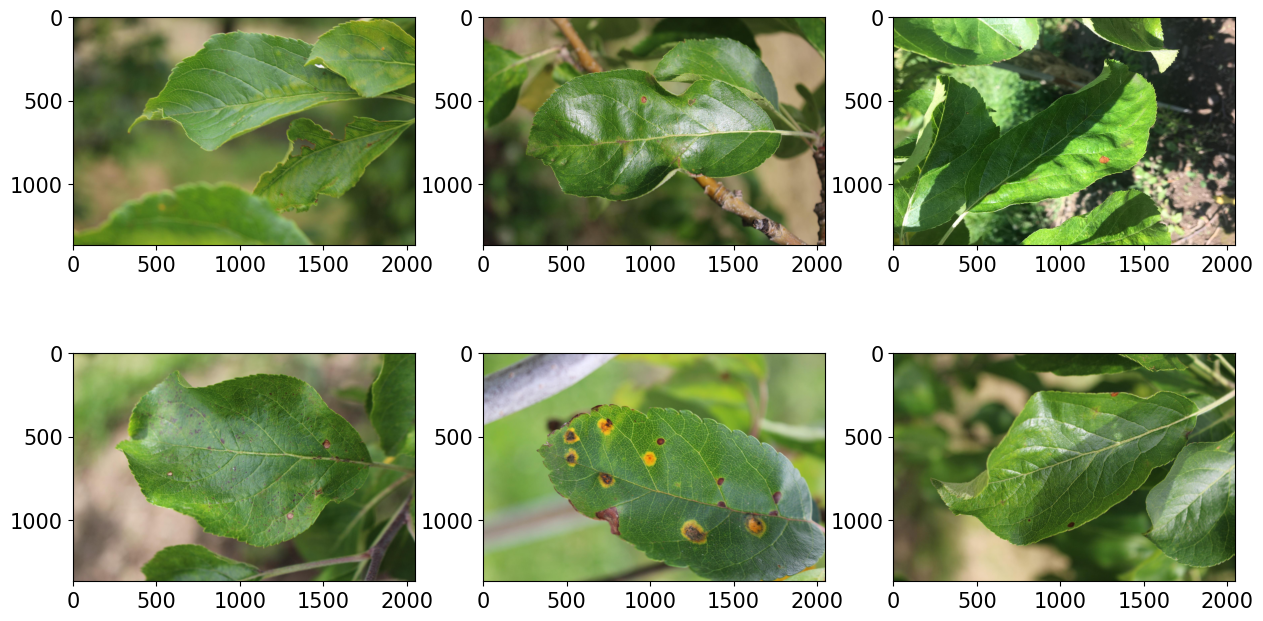

In [12]:
show_image(last_multiple_diseases_img_ids)

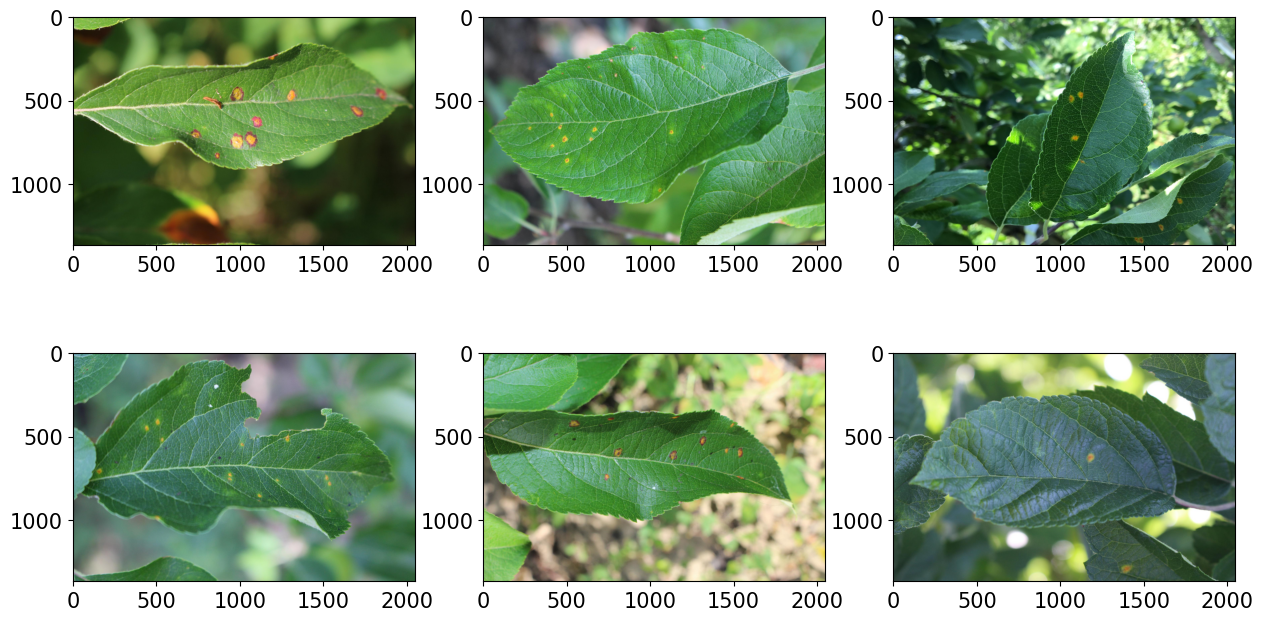

In [13]:
show_image(last_rust_img_ids)

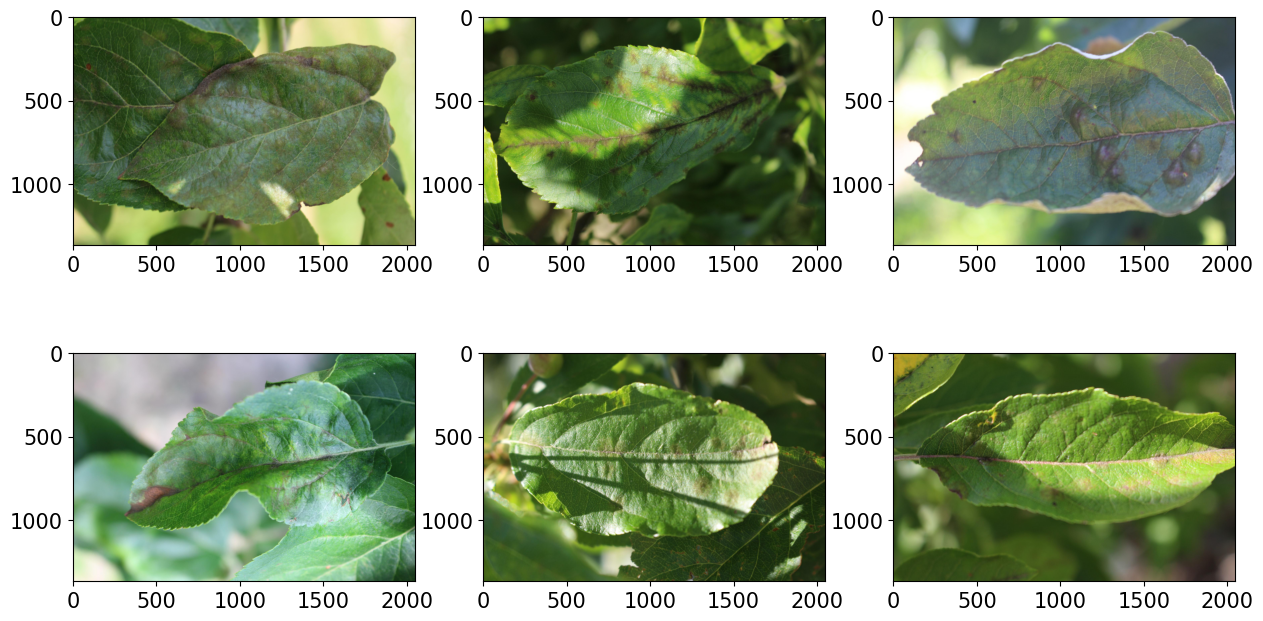

In [14]:
show_image(last_scab_img_ids)